<a href="https://colab.research.google.com/github/sr606/LLM/blob/main/mermaid_trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.3 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network

# Create network
net = Network(
    height="800px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black",
    notebook=True # Added this line
)

# -------------------
# Add Nodes
# -------------------

# Source
net.add_node(
    "ORA_SRC",
    label="ORA_Ext_Vehicle_Off_Road_Data\n'Oracle Source'",
    shape="box",
    color="#FFE0B2"
)

# Lookup
net.add_node(
    "VEH_DIM",
    label="HF_SMR_VEHICLE_DIM\n'Vehicle Lookup'",
    shape="database",
    color="#E1BEE7"
)

# Transformer
net.add_node(
    "TFM",
    label="Tfm_LoadRecords\n'Transformer'",
    shape="diamond",
    color="#F48FB1"
)

# Fact table
net.add_node(
    "FACT",
    label="HF_FACT_VOR_DATA\n'Hashed File'",
    shape="database",
    color="#BBDEFB"
)

# Exception file
net.add_node(
    "EXC",
    label="Supp_VOR_Exception\n'CSV Exception File'",
    shape="box",
    color="#E3F2FD"
)

# Stage table
net.add_node(
    "STG",
    label="Ora_StgVehicleOffRoad\n'Oracle Stage Table'",
    shape="database",
    color="#FFF9C4"
)

# -------------------
# Add Edges
# -------------------

net.add_edge(
    "ORA_SRC",
    "TFM",
    label="Lnk_Vehicle_off_Road_Data"
)

net.add_edge(
    "VEH_DIM",
    "TFM",
    label="lkVehicleDim_Reg",
    dashes=True
)

net.add_edge(
    "TFM",
    "FACT",
    label="Load_HFVehicleoffRoad"
)

net.add_edge(
    "TFM",
    "EXC",
    label="Load_VOR_Exception_File"
)

net.add_edge(
    "FACT",
    "STG",
    label="Load_StgVehicleoffRoad"
)

# -------------------
# Physics & Layout
# -------------------
net.set_options("""
{
  "layout": {
    "hierarchical": {
      "enabled": true,
      "direction": "UD",
      "levelSeparation": 170,
      "nodeSpacing": 220,
      "treeSpacing": 260,
      "sortMethod": "directed"
    }
  },
  "physics": {
    "enabled": false
  },
  "edges": {
    "arrows": {
      "to": { "enabled": true }
    },
    "smooth": {
      "enabled": false
    },
    "font": {
      "size": 12,
      "align": "middle"
    }
  },
  "nodes": {
    "shapeProperties": {
      "interpolation": false
    },
    "font": {
      "size": 14,
      "multi": "html"
    }
  }
}
""")


# Generate HTML
net.show("etl_flow_diagram.html", notebook=True)

etl_flow_diagram.html


In [ ]:
net.set_options("""
var options = {
  layout: {
    hierarchical: {
      enabled: true,
      direction: "UD",
      levelSeparation: 170,
      nodeSpacing: 220,
      treeSpacing: 260,
      sortMethod: "directed"
    }
  },
  physics: {
    enabled: false
  },
  edges: {
    arrows: {
      to: { enabled: true }
    },
    smooth: {
      enabled: false
    },
    font: {
      size: 12,
      align: "middle"
    }
  },
  nodes: {
    shapeProperties: {
      interpolation: false
    },
    font: {
      size: 14,
      multi: "html"
    }
  }
}
""")


In [ ]:
from pyvis.network import Network

net = Network(
    height="850px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black",
    notebook=True # Added this line
)

# --------------------
# Nodes
# --------------------

# Job container (logical)
net.add_node(
    "JOB",
    label="SeqFile_DS_Sorter\nJob Version: 56.0.0\nOwner: APT",
    shape="box",
    color="#E1F5FE"
)

# Input File
net.add_node(
    "INPUT",
    label="Sequential File Input\n(CustomStage)",
    shape="database",
    color="#FFF3E0"
)

# Sort
net.add_node(
    "SORT",
    label="Sort Stage\n(CustomStage)",
    shape="diamond",
    color="#F8BBD0"
)

# Output File
net.add_node(
    "OUTPUT",
    label="Sequential File Output\nE:\\sample_res.csv",
    shape="database",
    color="#E8F5E9"
)

# --------------------
# Edges
# --------------------

net.add_edge(
    "JOB",
    "INPUT",
    label="Job Controls & Metadata",
    dashes=True
)

net.add_edge(
    "INPUT",
    "SORT",
    label="DSLink3\n(Continue on condition)",
    width=2
)

net.add_edge(
    "SORT",
    "OUTPUT",
    label="DSLink4\nFail on Lookup / Condition",
    width=2,
    color="#D32F2F"
)

# --------------------
# Layout Fix
# --------------------

net.set_options("""
{
  "layout": {
    "hierarchical": {
      "enabled": true,
      "direction": "UD",
      "levelSeparation": 180,
      "nodeSpacing": 250
    }
  },
  "physics": {
    "enabled": false
  },
  "edges": {
    "arrows": {
      "to": { "enabled": true }
    },
    "smooth": {
      "enabled": false
    },
    "font": {
      "size": 12
    }
  }
}
""")

net.show("datastage_job_diagram.html")

datastage_job_diagram.html


In [ ]:
from pyvis.network import Network

net = Network(
    height="900px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black",
    notebook=True # Added this line
)

# ------------------------
# Nodes
# ------------------------

# Job
net.add_node(
    "JOB",
    label=(
        "jbSMR3010251UpdVORExceptionReport\n"
        "Version: 56.0.0\n"
        "Purpose: Load VOR Exception Reports"
    ),
    shape="box",
    color="#E3F2FD"
)

# Sources
net.add_node(
    "SRC_VOR",
    label="VorExceptionReports\n(CustomStage)",
    shape="database",
    color="#FFF3E0"
)

net.add_node(
    "SRC_GARAGE",
    label="Src_VOR_I247_GARAGE_MAPPING\n(CustomStage)",
    shape="database",
    color="#FFF3E0"
)

# Lookups
net.add_node(
    "LKP_EXIST",
    label="Check Existing Exception\n(Lookup)",
    shape="ellipse",
    color="#E1BEE7"
)

net.add_node(
    "LKP_GARAGE",
    label="Check Garage Mapping Exists\n(Lookup)",
    shape="ellipse",
    color="#E1BEE7"
)

# Transformer
net.add_node(
    "TRANSFORM",
    label="TrExceptionReport\n(Transformer)",
    shape="diamond",
    color="#F8BBD0"
)

# Output File
net.add_node(
    "CSV",
    label=(
        "VOR_EXCEPTIONS_FILE\n"
        "CSV Output\n"
        "#pSMROutputPath#/#pVOR_Exception_Report#_#pFiledate#.csv"
    ),
    shape="database",
    color="#E8F5E9"
)

# Hashed File
net.add_node(
    "HASH",
    label="HF_I247_GARAGE_MAPPING\n(Hashed File)",
    shape="database",
    color="#BBDEFB"
)

# ------------------------
# Edges
# ------------------------

net.add_edge("JOB", "SRC_VOR", label="Job Context", dashes=True)
net.add_edge("JOB", "SRC_GARAGE", label="Job Context", dashes=True)

net.add_edge("SRC_VOR", "LKP_EXIST", label="Lookup Existing Exception")
net.add_edge("SRC_GARAGE", "LKP_GARAGE", label="Lookup Garage Mapping")

net.add_edge("LKP_EXIST", "TRANSFORM", label="If Exists / New")
net.add_edge("LKP_GARAGE", "TRANSFORM", label="If Mapping Found")

net.add_edge(
    "TRANSFORM",
    "CSV",
    label="Write Exception Report",
    width=2
)

net.add_edge(
    "TRANSFORM",
    "HASH",
    label="Update Garage Mapping",
    width=2
)

# ------------------------
# Layout (CRITICAL)
# ------------------------

net.set_options("""
{
  "layout": {
    "hierarchical": {
      "enabled": true,
      "direction": "UD",
      "levelSeparation": 160,
      "nodeSpacing": 240
    }
  },
  "physics": {
    "enabled": false
  },
  "edges": {
    "arrows": {
      "to": { "enabled": true }
    },
    "smooth": {
      "enabled": false
    },
    "font": {
      "size": 12
    }
  }
}
""")

net.show("vor_exception_report_job.html")

vor_exception_report_job.html


In [ ]:
#model.py
from dataclasses import dataclass, field
from typing import List, Dict

@dataclass
class Stage:
    name: str
    stage_type: str
    outputs: List[str] = field(default_factory=list)

@dataclass
class Link:
    source: str
    target: str
    label: str = "link"

@dataclass
class JobModel:
    job_name: str
    stages: Dict[str, Stage]
    links: List[Link]


In [ ]:
#parser.py
import re
from src.model import JobModel, Stage, Link


def parse_pseudocode(text: str) -> JobModel:
    job_name = "UNKNOWN_JOB"
    stages = {}
    links = []

    current_stage = None

    for line in text.splitlines():
        line = line.strip()

        # Job name
        if line.startswith("// Record ROOT:"):
            job_name = line.split(":", 1)[1].strip()

        # Stage definition
        elif line.startswith("// Stage:"):
            match = re.search(r"// Stage:\s*(.*?)\s*\((.*?)\)", line)
            if match:
                stage_name, stage_type = match.groups()
                current_stage = stage_name
                stages[stage_name] = Stage(
                    name=stage_name,
                    stage_type=stage_type
                )

        # Link partner
        elif "Partner =" in line and current_stage:
            partner = line.split("=", 1)[1].strip()
            links.append(
                Link(
                    source=current_stage,
                    target=partner,
                    label="lookup / link"
                )
            )

        # Output file
        elif "FileName =" in line and current_stage:
            filename = line.split("=", 1)[1].strip()
            stages[current_stage].outputs.append(filename)

    return JobModel(
        job_name=job_name,
        stages=stages,
        links=links
    )


In [ ]:
#renderer.py
from pyvis.network import Network
from src.model import JobModel


def render_diagram(model: JobModel, output_html: str):
    net = Network(
        height="900px",
        width="100%",
        directed=True
    )

    # Job node
    net.add_node(
        "JOB",
        label=f"{model.job_name}\n(DataStage Job)",
        shape="box",
        color="#E3F2FD"
    )

    # Stage nodes
    for stage in model.stages.values():
        shape = "ellipse"
        color = "#FFF3E0"

        if "Transformer" in stage.stage_type:
            shape = "diamond"
            color = "#F8BBD0"
        elif "HashedFile" in stage.stage_type:
            shape = "database"
            color = "#BBDEFB"
        elif "File" in stage.stage_type:
            shape = "database"
            color = "#E8F5E9"

        net.add_node(
            stage.name,
            label=f"{stage.name}\n({stage.stage_type})",
            shape=shape,
            color=color
        )

        # Job context link
        net.add_edge("JOB", stage.name, dashes=True)

        # Output notes
        for out in stage.outputs:
            out_node = f"{stage.name}_OUT"
            net.add_node(
                out_node,
                label=out,
                shape="box",
                color="#E8F5E9"
            )
            net.add_edge(stage.name, out_node, label="writes")

    # Links
    for link in model.links:
        net.add_edge(
            link.source,
            link.target,
            label=link.label
        )

    # SAFE JSON OPTIONS
    net.set_options("""
    {
      "layout": {
        "hierarchical": {
          "enabled": true,
          "direction": "UD",
          "levelSeparation": 160,
          "nodeSpacing": 240
        }
      },
      "physics": {
        "enabled": false
      },
      "edges": {
        "arrows": {
          "to": { "enabled": true }
        },
        "smooth": { "enabled": false }
      }
    }
    """)

    net.write_html(output_html, notebook=False, open_browser=False)


In [ ]:
#main.py
from src.parser import parse_pseudocode
from src.renderer import render_diagram

INPUT_FILE = "input/pseudocode.txt"
OUTPUT_FILE = "output/diagram.html"


def main():
    with open(INPUT_FILE, "r") as f:
        pseudocode = f.read()

    model = parse_pseudocode(pseudocode)
    render_diagram(model, OUTPUT_FILE)

    print(f"✅ Diagram generated: {OUTPUT_FILE}")


if __name__ == "__main__":
    main()


In [1]:
pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


In [4]:
from pyvis.network import Network

# Create a Pyvis network with left-to-right layout
net = Network(directed=True, height='900px', width='1400px', bgcolor='#ffffff', font_color='black', notebook=True)

# Use hierarchical layout for clearer left-to-right flow
net.barnes_hut(gravity=-20000, central_gravity=0.3, spring_length=250, spring_strength=0.05, damping=0.09)
net.set_options("""
{
  "layout": {
    "hierarchical": {
      "enabled": true,
      "direction": "LR",
      "sortMethod": "directed",
      "nodeSpacing": 250,
      "levelSeparation": 200
    }
  },
  "physics": {
    "enabled": false
  }
}
""")

# Define nodes by groups (subgraphs)
nodes = {
    "DataInputs": [
        ("CS", "Customer Segments\n(SQL Server Stored Procedure)\nusp_GetCustomerSegments\nFilters:\n- Date Range: 01-01-2024 to 31-12-2024\n- Min Transactions: 5\n- Segment Type: Premium"),
        ("PP", "Product Performance\n(SQL Server Stored Procedure)\nusp_GetProductPerformance\nFilters:\n- Date Range: 01-01-2024 to 31-12-2024\n- Min Quantity: 50\n- Category: Electronics"),
        ("SA", "Sales Analytics\n(SQL Server Stored Procedure)\nusp_GetSalesAnalytics\nFilters:\n- Date Range: 01-01-2024 to 31-12-2024\n- Region: North America\n- Min Sales Amount: 100000"),
        ("IS", "Inventory Status\n(SQL Server Stored Procedure)\nusp_GetInventoryStatus\nFilters:\n- WarehouseID: 1\n- Category: Electronics\n- Low Stock Threshold: 15\n- Reorder Level: 30"),
        ("CM", "Customer Master\n(CSV File Input)"),
        ("PC", "Product Catalog\n(XLS File Input)"),
    ],
    "CleanTransform": [
        ("DC", "Clean Customer Data\n(Data Cleansing Transformation)\n- Removes errors, blanks, duplicates"),
        ("AF", "Auto Field Product Data\n(AutoField Transformation)\n- Sets data types and sizes"),
    ],
    "Joins": [
        ("J1", "Join Customer Data\nCriteria: Left.CustomerID == Right.CustomerID\n- Combines customer segment & master data"),
        ("J2", "Join Product Data\nCriteria: Left.ProductID == Right.ProductID\n- Combines product performance & catalog data"),
        ("J3", "Join Inventory Data\nCriteria: Left.ProductID == Right.ProductID\n- Combines inventory status & product catalog data"),
    ],
    "Calculations": [
        ("CV", "Calculate Value Score\n(Formula)\n- Computes customer value metric"),
        ("CPM", "Calculate Profit Margin\n(Formula)\n- Computes profit margin per product"),
        ("FH", "Filter High Performance\n(Filter)\n- Filters sales data for high performers"),
    ],
    "Aggregations": [
        ("CSS", "Customer Segment Summary\n(Aggregate Data)\n- Summarizes by segments"),
        ("PCS", "Product Category Summary\n(Aggregate Data)\n- Summarizes by categories"),
        ("ISS", "Inventory Status Summary\n(Aggregate Data)\n- Summarizes inventory stock status"),
    ],
    "Outputs": [
        ("CADB", "Customer Analytics DB\n(SQL Server Table)\n- Stores summarized customer analytics"),
        ("PAXLS", "Product Analytics XLS\n(Excel File)\n- Stores summarized product analytics"),
        ("SADB", "Sales Analytics DB\n(SQL Server Table)\n- Stores filtered sales analytics"),
        ("IACSV", "Inventory Analytics CSV\n(CSV File)\n- Stores summarized inventory data"),
    ],
    "BrowseViews": [
        ("BV_Cust", "Browse Customer Data\n- View customer data at various points"),
        ("BV_Prod", "Browse Product Data\n- View product data at various points"),
        ("BV_Inv", "Browse Inventory Data\n- View inventory data at various points"),
    ],
}

# Add nodes with rectangular shape and grouped colors for clarity
group_colors = {
    "DataInputs": "#AED6F1",
    "CleanTransform": "#A9DFBF",
    "Joins": "#F9E79F",
    "Calculations": "#F5B7B1",
    "Aggregations": "#D7BDE2",
    "Outputs": "#FAD7A0",
    "BrowseViews": "#A3E4D7",
}

for group, items in nodes.items():
    for node_id, label in items:
        net.add_node(node_id, label=label, shape='box', color=group_colors[group], font={"size":14})

# Define edges based on connections in your Mermaid code
edges = [
    # Inputs to Cleaning/Transforms
    ("CS", "DC"),
    ("PP", "AF"),
    ("CM", "J1"),
    ("PC", "J2"),
    ("PC", "J3"),
    ("SA", "FH"),
    ("IS", "J3"),
    # Cleaning/Transforms to Joins
    ("DC", "J1"),
    ("AF", "J2"),
    # Joins to Calculations
    ("J1", "CV"),
    ("J2", "CPM"),
    ("FH", "SADB"),
    ("J3", "ISS"),
    # Calculations to Aggregations
    ("CV", "CSS"),
    ("CPM", "PCS"),
    # Aggregations to Outputs
    ("CSS", "CADB"),
    ("PCS", "PAXLS"),
    ("ISS", "IACSV"),
    # Outputs to Browse Views
    ("CADB", "BV_Cust"),
    ("PAXLS", "BV_Prod"),
    ("IACSV", "BV_Inv"),
]

for src, dst in edges:
    net.add_edge(src, dst, arrows='to', smooth={'type': 'cubicBezier'})

# Generate and save the graph
net.show("alteryx_sttm_flowchart.html")

alteryx_sttm_flowchart.html


In [5]:
from pyvis.network import Network

# --------------------------------------------------
# Create network
# --------------------------------------------------
net = Network(
    height="900px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black",
    notebook = True
)

net.toggle_physics(False)  # keeps layout stable & clean

# --------------------------------------------------
# Helper function for consistent nodes
# --------------------------------------------------
def add_node(id, label, group, x, y, color="#E6D9F2"):
    net.add_node(
        id,
        label=label,
        shape="box",
        group=group,
        x=x,
        y=y,
        fixed=True,
        color=color,
        font={"size": 14}
    )

# --------------------------------------------------
# DATA INPUTS (Sources)
# --------------------------------------------------
add_node(
    "CS",
    """Customer Segments
(SQL Server Stored Procedure)
usp_GetCustomerSegments
Filters:
• Date Range: 01-01-2024 to 31-12-2024
• Min Transactions: 5
• Segment Type: Premium""",
    "inputs", -900, -300
)

add_node(
    "PP",
    """Product Performance
(SQL Server Stored Procedure)
usp_GetProductPerformance
Filters:
• Date Range: 01-01-2024 to 31-12-2024
• Min Quantity: 50
• Category: Electronics""",
    "inputs", -900, -150
)

add_node(
    "SA",
    """Sales Analytics
(SQL Server Stored Procedure)
usp_GetSalesAnalytics
Filters:
• Date Range: 01-01-2024 to 31-12-2024
• Region: North America
• Min Sales Amount: 100000""",
    "inputs", -900, 0
)

add_node(
    "IS",
    """Inventory Status
(SQL Server Stored Procedure)
usp_GetInventoryStatus
Filters:
• WarehouseID: 1
• Category: Electronics
• Low Stock Threshold: 15
• Reorder Level: 30""",
    "inputs", -900, 150
)

add_node("CM", "Customer Master\n(CSV File Input)", "inputs", -900, 300)
add_node("PC", "Product Catalog\n(XLS File Input)", "inputs", -900, 450)

# --------------------------------------------------
# DATA CLEANING & TRANSFORMATION
# --------------------------------------------------
add_node(
    "DC",
    """Clean Customer Data
(Data Cleansing Transformation)
• Removes errors, blanks
• Removes duplicates""",
    "clean", -450, -200, "#D5E8D4"
)

add_node(
    "AF",
    """Auto Field Product Data
(AutoField Transformation)
• Automatically sets
  data types & sizes""",
    "clean", -450, 100, "#D5E8D4"
)

# --------------------------------------------------
# JOINS
# --------------------------------------------------
add_node(
    "J1",
    """Join Customer Data
Criteria:
Left.CustomerID = Right.CustomerID
• Combines customer segments
  & master data""",
    "joins", -100, -200, "#FFF2CC"
)

add_node(
    "J2",
    """Join Product Data
Criteria:
Left.ProductID = Right.ProductID
• Combines product performance
  & catalog data""",
    "joins", -100, 50, "#FFF2CC"
)

add_node(
    "J3",
    """Join Inventory Data
Criteria:
Left.ProductID = Right.ProductID
• Combines inventory status
  & product catalog data""",
    "joins", -100, 300, "#FFF2CC"
)

# --------------------------------------------------
# CALCULATIONS & FILTERING
# --------------------------------------------------
add_node(
    "CV",
    """Calculate Value Score
(Formula)
• Computes customer
  value metric""",
    "calc", 250, -200, "#F8CECC"
)

add_node(
    "CPM",
    """Calculate Profit Margin
(Formula)
• Computes profit
  margin per product""",
    "calc", 250, 50, "#F8CECC"
)

add_node(
    "FH",
    """Filter High Performance
(Filter)
• Filters sales data
  for high performers""",
    "calc", 250, 300, "#F8CECC"
)

# --------------------------------------------------
# AGGREGATIONS & SUMMARIES
# --------------------------------------------------
add_node(
    "CSS",
    """Customer Segment Summary
(Aggregate Data)
• Summarizes customer
  data by segments""",
    "agg", 600, -200, "#E1D5E7"
)

add_node(
    "PCS",
    """Product Category Summary
(Aggregate Data)
• Summarizes product
  data by categories""",
    "agg", 600, 50, "#E1D5E7"
)

add_node(
    "ISS",
    """Inventory Status Summary
(Aggregate Data)
• Summarizes inventory
  stock status""",
    "agg", 600, 300, "#E1D5E7"
)

# --------------------------------------------------
# OUTPUTS
# --------------------------------------------------
add_node(
    "CADB",
    """Customer Analytics DB
(SQL Server Table)
• Stores summarized
  customer analytics""",
    "output", 950, -200, "#DAE8FC"
)

add_node(
    "PAXLS",
    """Product Analytics XLS
(Excel File)
• Stores summarized
  product analytics""",
    "output", 950, 50, "#DAE8FC"
)

add_node(
    "SADB",
    """Sales Analytics DB
(SQL Server Table)
• Stores filtered
  sales analytics""",
    "output", 950, 300, "#DAE8FC"
)

add_node(
    "IACSV",
    """Inventory Analytics CSV
(CSV File)
• Stores summarized
  inventory data""",
    "output", 950, 450, "#DAE8FC"
)

# --------------------------------------------------
# EDGES (FLOW)
# --------------------------------------------------
edges = [
    ("CS", "DC"), ("CM", "J1"),
    ("DC", "J1"), ("J1", "CV"), ("CV", "CSS"), ("CSS", "CADB"),

    ("PP", "AF"), ("PC", "J2"),
    ("AF", "J2"), ("J2", "CPM"), ("CPM", "PCS"), ("PCS", "PAXLS"),

    ("IS", "J3"), ("PC", "J3"),
    ("J3", "ISS"), ("ISS", "IACSV"),

    ("SA", "FH"), ("FH", "SADB")
]

for src, dst in edges:
    net.add_edge(src, dst, arrows="to")

# --------------------------------------------------
# SAVE & SHOW
# --------------------------------------------------
net.show("perfect_flowchart.html")

perfect_flowchart.html


In [6]:
pip install graphviz

In [9]:
import graphviz

dot_code = """
digraph ETL_Pipeline {

    /* ---------------- GLOBAL SETTINGS ---------------- */
    rankdir=LR;
    fontname="Helvetica";

    node [
        shape=box,
        style="rounded,filled",
        fontname="Helvetica",
        fontsize=10,
        margin="0.2,0.15"
    ];

    edge [
        color="#555555",
        arrowsize=0.8
    ];

    /* ---------------- DATA INPUTS ---------------- */
    subgraph cluster_inputs {
        label="Data Inputs (Sources)";
        style="rounded";
        color="#5DADE2";
        bgcolor="#EBF5FB";

        CS [label="Customer Segments\n(SQL Stored Procedure)\nusp_GetCustomerSegments\n• Filters:\n• Date: 01-01-2024 to 31-12-2024\n• Min Transactions: 5\n• Segment: Premium"];
        PP [label="Product Performance\n(SQL Stored Procedure)\nusp_GetProductPerformance\n• Filters:\n• Date: 01-01-2024 to 31-12-2024\n• Qty ≥ 50\n• Category: Electronics"];
        SA [label="Sales Analytics\n(SQL Stored Procedure)\nusp_GetSalesAnalytics\n• Filters:\n• Date: 01-01-2024 to 31-12-2024\n• Region: North America\n• Min Sales: 100000"];
        IS [label="Inventory Status\n(SQL Stored Procedure)\nusp_GetInventoryStatus\n• Filters:\n• WarehouseID: 1\n•Category: Electronics\n• Low Stock < 15\n• Reorder Level: 30"];
        CM [label="Customer Master\n(CSV File Input)"];
        PC [label="Product Catalog\n(XLS File Input)"];
    }

    /* ---------------- DATA CLEANING ---------------- */
    subgraph cluster_cleaning {
        label="Data Cleaning & Transformation";
        style="rounded";
        color="#58D68D";
        bgcolor="#E9F7EF";

        DC [label="Clean Customer Data\n(Data Cleansing)\n• Remove blanks\n• Remove duplicates\n• Remove errors"];
        AF [label="Auto Field Product Data\n(AutoField)\n• Auto datatype detection\n• Auto field sizing"];
    }

    /* ---------------- DATA JOINS ---------------- */
    subgraph cluster_joins {
        label="Data Joins";
        style="rounded";
        color="#F4D03F";
        bgcolor="#FEF9E7";

        J1 [label="Join Customer Data\nCustomerID\n• Segment + Master"];
        J2 [label="Join Product Data\nProductID\n• Performance + Catalog"];
        J3 [label="Join Inventory Data\nProductID\n• Inventory + Catalog"];
    }

    /* ---------------- CALCULATIONS ---------------- */
    subgraph cluster_calculations {
        label="Calculations & Filtering";
        style="rounded";
        color="#EC7063";
        bgcolor="#FDEDEC";

        CV  [label="Calculate Value Score\n(Formula)\n• Customer value metric"];
        CPM [label="Calculate Profit Margin\n(Formula)\n• Margin per product"];
        FH  [label="Filter High Performance\n(Filter)\n• Top performing sales"];
    }

    /* ---------------- AGGREGATIONS ---------------- */
    subgraph cluster_aggregations {
        label="Aggregations & Summaries";
        style="rounded";
        color="#AF7AC5";
        bgcolor="#F5EEF8";

        CSS [label="Customer Segment Summary\n(Aggregate)\n• By customer segment"];
        PCS [label="Product Category Summary\n(Aggregate)\n• By product category"];
        ISS [label="Inventory Status Summary\n(Aggregate)\n• Stock status"];
    }

    /* ---------------- OUTPUTS ---------------- */
    subgraph cluster_outputs {
        label="Outputs (Data Destinations)";
        style="rounded";
        color="#5499C7";
        bgcolor="#EBF5FB";

        CADB [label="Customer Analytics DB\n(SQL Server Table)"];
        PAXLS [label="Product Analytics XLS\n(Excel File)"];
        SADB [label="Sales Analytics DB\n(SQL Server Table)"];
        IACSV [label="Inventory Analytics CSV\n(CSV File)"];
    }

    /* ---------------- DATA FLOW ---------------- */
    CS -> DC;
    CM -> J1;
    DC -> J1;

    PP -> AF;
    PC -> J2;
    AF -> J2;

    IS -> J3;
    PC -> J3;

    J1 -> CV;
    J2 -> CPM;
    SA -> FH;

    CV -> CSS;
    CPM -> PCS;
    J3 -> ISS;

    CSS -> CADB;
    PCS -> PAXLS;
    FH  -> SADB;
    ISS -> IACSV;
}
"""

src = graphviz.Source(dot_code)
src.render('etl_pipeline_diagram', view=True, format='pdf')

'etl_pipeline_diagram.pdf'

In [2]:
import graphviz

dot_code = """
digraph ETL_Pipeline {

    /* ---------------- GLOBAL SETTINGS ---------------- */
    rankdir=LR;
    fontname="Helvetica";

    node [
        shape=box,
        style="rounded,filled",
        fontname="Helvetica",
        fontsize=10,
        margin="0.2,0.15"
    ];

    edge [
        color="#555555",
        arrowsize=0.8
    ];

    /* ---------------- DATA INPUTS ---------------- */
    subgraph cluster_inputs {
        label="Data Inputs (Sources)";
        style="rounded";
        color="#5DADE2";
        bgcolor="#EBF5FB";

        CS [label="Customer Segments\n(SQL Stored Procedure)\nusp_GetCustomerSegments\n• Filters:\n• Date: 01-01-2024 to 31-12-2024\n• Min Transactions: 5\n• Segment: Premium"];
        PP [label="Product Performance\n(SQL Stored Procedure)\nusp_GetProductPerformance\n• Filters:\n• Date: 01-01-2024 to 31-12-2024\n• Qty ≥ 50\n• Category: Electronics"];
        SA [label="Sales Analytics\n(SQL Stored Procedure)\nusp_GetSalesAnalytics\n• Filters:\n• Date: 01-01-2024 to 31-12-2024\n• Region: North America\n• Min Sales: 100000"];
        IS [label="Inventory Status\n(SQL Stored Procedure)\nusp_GetInventoryStatus\n• Filters:\n• WarehouseID: 1\n•Category: Electronics\n• Low Stock < 15\n• Reorder Level: 30"];
        CM [label="Customer Master\n(CSV File Input)"];
        PC [label="Product Catalog\n(XLS File Input)"];
    }

    /* ---------------- DATA CLEANING ---------------- */
    subgraph cluster_cleaning {
        label="Data Cleaning & Transformation";
        style="rounded";
        color="#58D68D";
        bgcolor="#E9F7EF";

        DC [label="Clean Customer Data\n(Data Cleansing)"];
        AF [label="Auto Field Product Data\n(AutoField)"];
    }

    /* ---------------- DATA JOINS ---------------- */
    subgraph cluster_joins {
        label="Data Joins";
        style="rounded";
        color="#F4D03F";
        bgcolor="#FEF9E7";

        J1 [label="Join Customer Data\nCriteria: Left.CustomerID == Right.CustomerID\n• Combines customer segment & master data"];
        J2 [label="Join Product Data\nCriteria: Left.ProductID == Right.ProductID\n• Combines product performance & catalog data"];
        J3 [label="Join Inventory Data\nCriteria: Left.ProductID == Right.ProductID\n• Combines inventory status & product catalog data"];
    }

    /* ---------------- CALCULATIONS ---------------- */
    subgraph cluster_calculations {
        label="Calculations & Filtering";
        style="rounded";
        color="#EC7063";
        bgcolor="#FDEDEC";

        CV  [label="Calculate Value Score\n(Formula)\n• Customer value metric"];
        CPM [label="Calculate Profit Margin\n(Formula)\n• Margin per product"];
        FH  [label="Filter High Performance\n(Filter)\n• Top performing sales"];
    }

    /* ---------------- AGGREGATIONS ---------------- */
    subgraph cluster_aggregations {
        label="Aggregations & Summaries";
        style="rounded";
        color="#AF7AC5";
        bgcolor="#F5EEF8";

        CSS [label="Customer Segment Summary\n(Aggregate)\n• By customer segment"];
        PCS [label="Product Category Summary\n(Aggregate)\n• By product category"];
        ISS [label="Inventory Status Summary\n(Aggregate)\n• Stock status"];
    }

    /* ---------------- OUTPUTS ---------------- */
    subgraph cluster_outputs {
        label="Outputs (Data Destinations)";
        style="rounded";
        color="#5499C7";
        bgcolor="#EBF5FB";

        CADB [label="Customer Analytics DB\n(SQL Server Table)"];
        PAXLS [label="Product Analytics XLS\n(Excel File)"];
        SADB [label="Sales Analytics DB\n(SQL Server Table)"];
        IACSV [label="Inventory Analytics CSV\n(CSV File)"];
    }

    /* ---------------- DATA FLOW ---------------- */
    CS -> DC;
    CM -> J1;
    DC -> J1;

    PP -> AF;
    PC -> J2;
    AF -> J2;

    IS -> J3;
    PC -> J3;

    J1 -> CV;
    J2 -> CPM;
    SA -> FH;

    CV -> CSS;
    CPM -> PCS;
    J3 -> ISS;

    CSS -> CADB;
    PCS -> PAXLS;
    FH  -> SADB;
    ISS -> IACSV;
}
"""

src = graphviz.Source(dot_code)
src.render('etl_pipeline_diagram', view=True, format='pdf')

'etl_pipeline_diagram.pdf'

In [10]:
layers = {
    "data_sources": [
        "Customer Segments SP",
        "Product Performance SP",
        "Sales Analytics SP",
        "Inventory Status SP",
        "Customer Master CSV",
        "Product Catalog XLS"
    ],
    "data_cleaning": [
        "Clean Customer Data",
        "Auto Field Product Data"
    ],
    "calculations": [
        "Calculate Value Score",
        "Calculate Profit Margin",
        "Filter High Performance",
        "Sort by Stock Status"
    ],
    "joins": [
        "Join Customer Data",
        "Join Product Data",
        "Join Inventory Data"
    ],
    "aggregations": [
        "Customer Segment Summary",
        "Product Category Summary",
        "Inventory Status Summary"
    ],
    "outputs": [
        "Customer Analytics DB",
        "Product Analytics XLS",
        "Sales Analytics DB",
        "Inventory Analytics CSV"
    ]
}


In [11]:
edges = [
    ("Customer Segments SP", "Clean Customer Data"),
    ("Clean Customer Data", "Calculate Value Score"),
    ("Calculate Value Score", "Join Customer Data"),
    ("Join Customer Data", "Customer Segment Summary"),
    ("Customer Segment Summary", "Customer Analytics DB"),

    ("Product Performance SP", "Auto Field Product Data"),
    ("Auto Field Product Data", "Calculate Profit Margin"),
    ("Calculate Profit Margin", "Join Product Data"),
    ("Join Product Data", "Product Category Summary"),
    ("Product Category Summary", "Product Analytics XLS"),

    ("Sales Analytics SP", "Filter High Performance"),
    ("Filter High Performance", "Sales Analytics DB"),

    ("Inventory Status SP", "Sort by Stock Status"),
    ("Sort by Stock Status", "Join Inventory Data"),
    ("Join Inventory Data", "Inventory Status Summary"),
    ("Inventory Status Summary", "Inventory Analytics CSV"),
]


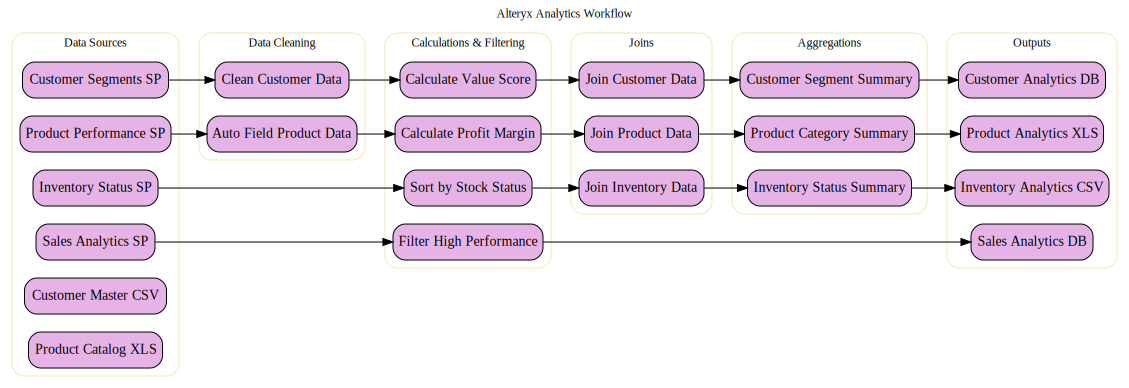

In [12]:
from graphviz import Digraph

dot = Digraph(
    name="Alteryx_Workflow",
    format="svg",
    graph_attr={
        "rankdir": "LR",
        "fontsize": "12",
        "labelloc": "t",
        "label": "Alteryx Analytics Workflow"
    }
)

dot.attr("node", shape="box", style="rounded,filled", fillcolor="#E6B3E6")

def add_layer(name, label, nodes):
    with dot.subgraph(name=f"cluster_{name}") as c:
        c.attr(label=label, style="rounded", color="#F5E6B3")
        for n in nodes:
            c.node(n)

add_layer("sources", "Data Sources", layers["data_sources"])
add_layer("clean", "Data Cleaning", layers["data_cleaning"])
add_layer("calc", "Calculations & Filtering", layers["calculations"])
add_layer("join", "Joins", layers["joins"])
add_layer("agg", "Aggregations", layers["aggregations"])
add_layer("out", "Outputs", layers["outputs"])

for src, tgt in edges:
    dot.edge(src, tgt)

dot

In [13]:
import re
from graphviz import Digraph
from collections import defaultdict

# ==============================
# 1️⃣ INPUT: RAW PSEUDOCODE TEXT
# ==============================

PSEUDOCODE = """
--- Customer Segments SP (ID: 1, DbFileInput) ---
--- Clean Customer Data (ID: 7, DataCleansing) ---
--- Calculate Value Score (ID: 8, Formula) ---
--- Join Customer Data (ID: 13, Join) ---
--- Customer Segment Summary (ID: 16, Summarize) ---
--- Customer Analytics DB (ID: 19, DbFileOutput) ---

--- Product Performance SP (ID: 2, DbFileInput) ---
--- Auto Field Product Data (ID: 9, AutoField) ---
--- Calculate Profit Margin (ID: 10, Formula) ---
--- Join Product Data (ID: 14, Join) ---
--- Product Category Summary (ID: 17, Summarize) ---
--- Product Analytics XLS (ID: 20, DbFileOutput) ---

--- Sales Analytics SP (ID: 3, DbFileInput) ---
--- Filter High Performance (ID: 11, Filter) ---
--- Sales Analytics DB (ID: 22, DbFileOutput) ---

--- Inventory Status SP (ID: 4, DbFileInput) ---
--- Sort by Stock Status (ID: 12, Sort) ---
--- Join Inventory Data (ID: 15, Join) ---
--- Inventory Status Summary (ID: 18, Summarize) ---
--- Inventory Analytics CSV (ID: 21, DbFileOutput) ---
"""

# ==================================
# 2️⃣ LAYER RULES (ENTERPRISE LOGIC)
# ==================================

LAYER_MAP = {
    "DbFileInput": "Data Sources",
    "DataCleansing": "Data Cleaning",
    "AutoField": "Data Cleaning",
    "Formula": "Calculations & Filtering",
    "Filter": "Calculations & Filtering",
    "Sort": "Calculations & Filtering",
    "Join": "Joins",
    "Summarize": "Aggregations",
    "DbFileOutput": "Outputs",
}

LAYER_ORDER = [
    "Data Sources",
    "Data Cleaning",
    "Calculations & Filtering",
    "Joins",
    "Aggregations",
    "Outputs",
]

# ==================================
# 3️⃣ PARSE TOOLS FROM PSEUDOCODE
# ==================================

tool_pattern = re.compile(
    r"---\s*(.*?)\s*\(ID:\s*(\d+),\s*(.*?)\)\s*---"
)

tools = []

for match in tool_pattern.finditer(PSEUDOCODE):
    name, tool_id, tool_type = match.groups()
    layer = LAYER_MAP.get(tool_type, "Other")
    tools.append({
        "name": name.strip(),
        "id": tool_id,
        "type": tool_type,
        "layer": layer
    })

# ==================================
# 4️⃣ AUTO-GENERATE FLOWS (SMART)
# ==================================

layered_tools = defaultdict(list)
for t in tools:
    layered_tools[t["layer"]].append(t["name"])

edges = []

for layer in LAYER_ORDER:
    nodes = layered_tools.get(layer, [])
    for i in range(len(nodes) - 1):
        edges.append((nodes[i], nodes[i + 1]))

# ==================================
# 5️⃣ BUILD GRAPHVIZ DIAGRAM
# ==================================

dot = Digraph(
    "Alteryx_Workflow",
    format="svg",
    graph_attr={
        "rankdir": "LR",
        "fontsize": "12",
        "labelloc": "t",
        "label": "Enterprise Alteryx Analytics Workflow"
    }
)

dot.attr(
    "node",
    shape="box",
    style="rounded,filled",
    fillcolor="#E6B3E6",
    fontname="Helvetica"
)

for layer in LAYER_ORDER:
    with dot.subgraph(name=f"cluster_{layer.replace(' ', '_')}") as c:
        c.attr(
            label=layer,
            style="rounded",
            color="#E5D8A8"
        )
        for node in layered_tools.get(layer, []):
            c.node(node)

for src, tgt in edges:
    dot.edge(src, tgt)

# ==================================
# 6️⃣ RENDER OUTPUT
# ==================================

dot.render("alteryx_workflow_diagram", cleanup=True)

print("✅ Diagram generated: alteryx_workflow_diagram.pdf")

✅ Diagram generated: alteryx_workflow_diagram.pdf


In [14]:
from graphviz import Digraph

# ==============================
# 1️⃣ TOOL DEFINITIONS (RICH)
# ==============================

tools = [
    {
        "id": "1",
        "name": "Customer Segments SP",
        "type": "DbFileInput",
        "layer": "Data Sources",
        "details": [
            "Table: CustomerSegments",
            "EXEC dbo.usp_GetCustomerSegments",
            "@StartDate = 2024-01-01",
            "@EndDate = 2024-12-31",
            "@MinTransactions = 5",
            "@SegmentType = Premium"
        ]
    },
    {
        "id": "7",
        "name": "Clean Customer Data",
        "type": "DataCleansing",
        "layer": "Data Cleaning",
        "details": [
            "Remove NULLs",
            "Trim fields",
            "Standardize values"
        ]
    },
    {
        "id": "8",
        "name": "Calculate Value Score",
        "type": "Formula",
        "layer": "Calculations & Filtering",
        "details": [
            "ValueScore = Revenue / Transactions",
            "HighValueFlag = ValueScore > 1000"
        ]
    },
    {
        "id": "13",
        "name": "Join Customer Data",
        "type": "Join",
        "layer": "Joins",
        "details": [
            "Join Type: Inner",
            "Left.CustomerID = Right.CustomerID"
        ]
    },
    {
        "id": "16",
        "name": "Customer Segment Summary",
        "type": "Summarize",
        "layer": "Aggregations",
        "details": [
            "Group By: Segment",
            "SUM(Revenue)",
            "COUNT(CustomerID)"
        ]
    },
    {
        "id": "19",
        "name": "Customer Analytics DB",
        "type": "DbFileOutput",
        "layer": "Outputs",
        "details": [
            "Target Table:",
            "CustomerAnalyticsSummary"
        ]
    }
]

# ==============================
# 2️⃣ LAYER ORDER
# ==============================

LAYER_ORDER = [
    "Data Sources",
    "Data Cleaning",
    "Calculations & Filtering",
    "Joins",
    "Aggregations",
    "Outputs"
]

# ==============================
# 3️⃣ BUILD GRAPH
# ==============================

dot = Digraph(
    "Alteryx_Detailed_Workflow",
    format="svg",
    graph_attr={
        "rankdir": "LR",
        "labelloc": "t",
        "fontsize": "12",
        "label": "Alteryx Workflow – Table & Parameter Level"
    }
)

dot.attr(
    "node",
    shape="box",
    style="rounded,filled",
    fillcolor="#E6B3E6",
    fontname="Helvetica",
    fontsize="10"
)

# ==============================
# 4️⃣ ADD LAYERS + NODES
# ==============================

nodes_by_layer = {layer: [] for layer in LAYER_ORDER}

for t in tools:
    label = (
        f"{t['name']}\n"
        f"({t['type']})\n"
        + "-" * 18 + "\n"
        + "\n".join(t["details"])
    )
    nodes_by_layer[t["layer"]].append((t["name"], label))

for layer in LAYER_ORDER:
    with dot.subgraph(name=f"cluster_{layer.replace(' ', '_')}") as c:
        c.attr(
            label=layer,
            style="rounded",
            color="#F2E3B6"
        )
        for node_id, node_label in nodes_by_layer[layer]:
            c.node(node_id, label=node_label)

# ==============================
# 5️⃣ FLOWS
# ==============================

edges = [
    ("Customer Segments SP", "Clean Customer Data"),
    ("Clean Customer Data", "Calculate Value Score"),
    ("Calculate Value Score", "Join Customer Data"),
    ("Join Customer Data", "Customer Segment Summary"),
    ("Customer Segment Summary", "Customer Analytics DB"),
]

for src, tgt in edges:
    dot.edge(src, tgt)

# ==============================
# 6️⃣ RENDER
# ==============================

dot.render("alteryx_detailed_workflow", cleanup=True)
print("✅ Detailed diagram generated: alteryx_detailed_workflow.svg")

✅ Detailed diagram generated: alteryx_detailed_workflow.svg


In [17]:
import re
from graphviz import Digraph
from collections import defaultdict


PSEUDOCODE =
// ======================================================================
// PSEUDOCODE: alteryx_sttm_example2.yxmd
// ======================================================================

// --- Browse Customer Data (ID: 23, BrowseV2) [Lines 605-624] ---
ACTION: Browse View

// --- Customer Analytics DB (ID: 19, DbFileOutput) [Lines 521-539] ---
ACTION: Write to Data Source
TABLE: CustomerAnalyticsSummary

// --- Customer Segment Summary (ID: 16, Summarize) [Lines 444-465] ---
ACTION: Aggregate Data

// --- Join Customer Data (ID: 13, Join) [Lines 361-384] ---
ACTION: Join Datasets
CRITERIA: Left.CustomerID == Right.CustomerID

// --- Calculate Value Score (ID: 8, Formula) [Lines 253-270] ---
ACTION: Calculate Formulas

// --- Clean Customer Data (ID: 7, DataCleansing) [Lines 231-249] ---
ACTION: DataCleansing Transformation

// --- Customer Segments SP (ID: 1, DbFileInput) [Lines 7-38] ---
ACTION: Read from Data Source
CONNECTION: Driver={SQL Server};Server=PROD_SERVER;
Database=AnalyticsDB;Trusted_Connection=Yes;
TABLE: CustomerSegments
[SQL STATEMENT]:
EXEC dbo.usp_GetCustomerSegments @StartDate = '2024-01-01', @EndDate = '2024-12-31', @MinTransactions = 5, @SegmentType = 'Premium'

// --- Browse Product Data (ID: 24, BrowseV2) [Lines 627-646] ---
ACTION: Browse View

// --- Product Analytics XLS (ID: 20, DbFileOutput) [Lines 543-559] ---
ACTION: Write to Data Source

// --- Product Category Summary (ID: 17, Summarize) [Lines 469-490] ---
ACTION: Aggregate Data

// --- Join Product Data (ID: 14, Join) [Lines 388-411] ---
ACTION: Join Datasets
CRITERIA: Left.ProductID == Right.ProductID

// --- Calculate Profit Margin (ID: 10, Formula) [Lines 297-314] ---
ACTION: Calculate Formulas

// --- Auto Field Product Data (ID: 9, AutoField) [Lines 274-293] ---
ACTION: AutoField Transformation

// --- Product Performance SP (ID: 2, DbFileInput) [Lines 42-74] ---
ACTION: Read from Data Source
CONNECTION: Driver={SQL Server};Server=PROD_SERVER;Database=AnalyticsDB;Trusted_Connection=Yes;
TABLE: ProductPerformance
[SQL STATEMENT]:
EXEC dbo.usp_GetProductPerformance @StartDate = '2024-01-01', @EndDate = '2024-12-31', @MinQuantity = 50, @CategoryFilter = 'Electronics'

// --- Sales Analytics DB (ID: 22, DbFileOutput) [Lines 583-601] ---
ACTION: Write to Data Source
TABLE: SalesAnalyticsSummary

// --- Filter High Performance (ID: 11, Filter) [Lines 318-333] ---
ACTION: Filter Rows

// --- Sales Analytics SP (ID: 3, DbFileInput) [Lines 78-112] ---
ACTION: Read from Data Source
CONNECTION: Driver={SQL Server};Server=PROD_SERVER;Database=AnalyticsDB;Trusted_Connection=Yes;
TABLE: SalesAnalytics
[SQL STATEMENT]:
EXEC dbo.usp_GetSalesAnalytics @StartDate = '2024-01-01', @EndDate = '2024-12-31', @RegionFilter = 'North America', @MinSalesAmount = 100000

// --- Browse Inventory Data (ID: 25, BrowseV2) [Lines 649-668] ---
ACTION: Browse View

// --- Inventory Analytics CSV (ID: 21, DbFileOutput) [Lines 563-579] ---
ACTION: Write to Data Source

// --- Inventory Status Summary (ID: 18, Summarize) [Lines 494-515] ---
ACTION: Aggregate Data

// --- Join Inventory Data (ID: 15, Join) [Lines 415-438] ---
ACTION: Join Datasets
CRITERIA: Left.ProductID == Right.ProductID

// --- Sort by Stock Status (ID: 12, Sort) [Lines 337-355] ---
ACTION: Sort Data

// --- Inventory Status SP (ID: 4, DbFileInput) [Lines 116-150] ---
ACTION: Read from Data Source
CONNECTION: Driver={SQL Server};Server=PROD_SERVER;Database=AnalyticsDB;Trusted_Connection=Yes;
TABLE: InventoryStatus
[SQL STATEMENT]:
EXEC dbo.usp_GetInventoryStatus @WarehouseID = 1, @CategoryFilter = 'Electronics', @LowStockThreshold = 15, @ReorderLevel = 30

// --- Customer Master CSV (ID: 5, DbFileInput) [Lines 154-188] ---
ACTION: Read from Data Source

// --- Product Catalog XLS (ID: 6, DbFileInput) [Lines 192-225] ---
ACTION: Read from Data Source


# ======================================================
# 2. TOOL TYPE → LAYER
# ======================================================

LAYER_MAP = {
    "DbFileInput": "Data Sources",
    "BrowseV2": "Outputs",
    "DbFileOutput": "Outputs",
    "DataCleansing": "Data Cleaning",
    "AutoField": "Data Cleaning",
    "Formula": "Calculations & Filtering",
    "Filter": "Calculations & Filtering",
    "Sort": "Calculations & Filtering",
    "Join": "Joins",
    "Summarize": "Aggregations",
}

LAYER_ORDER = [
    "Data Sources",
    "Data Cleaning",
    "Calculations & Filtering",
    "Joins",
    "Aggregations",
    "Outputs"
]

# ======================================================
# 3. PARSE TOOL BLOCKS
# ======================================================

header_re = re.compile(r"//---\s*(.*?)\s*\(ID:\s*\d+,\s*(.*?)\)")
blocks = re.split(r"//---", PSEUDOCODE)

tools = []

for block in blocks:
    block = block.strip()
    if not block:
        continue

    m = header_re.search("//--- " + block)
    if not m:
        continue

    name, tool_type = m.groups()
    details = [l.strip() for l in block.splitlines()[1:] if l.strip()]

    tools.append({
        "name": name.strip(),
        "type": tool_type.strip(),
        "layer": LAYER_MAP.get(tool_type.strip(), "Other"),
        "details": details
    })

# ======================================================
# 4. GROUP BY LAYER (ORDER PRESERVED)
# ======================================================

layers = defaultdict(list)
for t in tools:
    layers[t["layer"]].append(t)

# ======================================================
# 5. BUILD GRAPH
# ======================================================

dot = Digraph(
    "Alteryx_Workflow",
    format="svg",
    graph_attr={
        "rankdir": "LR",
        "labelloc": "t",
        "fontsize": "12",
        "label": "Alteryx Workflow – Generated Purely from Pseudocode"
    }
)

dot.attr(
    "node",
    shape="box",
    style="rounded,filled",
    fillcolor="#E6B3E6",
    fontname="Helvetica",
    fontsize="9",
    width="3"
)

previous_nodes = []

for layer in LAYER_ORDER:
    with dot.subgraph(name=f"cluster_{layer.replace(' ', '_')}") as c:
        c.attr(label=layer, style="rounded", color="#F2E3B6")
        c.attr(rank="same")

        current_nodes = []

        for t in layers.get(layer, []):
            node_id = t["name"].replace(" ", "_")
            label = (
                f"{t['name']}\n"
                f"({t['type']})\n"
                "--------------------\n"
                + "\n".join(t["details"])
            )
            c.node(node_id, label=label)
            current_nodes.append(node_id)

        # Connect ALL previous layer nodes → ALL current layer nodes
        for p in previous_nodes:
            for cnode in current_nodes:
                dot.edge(p, cnode)

        previous_nodes = current_nodes

# ======================================================
# 6. RENDER
# ======================================================

dot.render("alteryx_full_workflow", cleanup=True)
print("✅ Diagram generated: alteryx_full_workflow.svg")

✅ Diagram generated: alteryx_full_workflow.svg


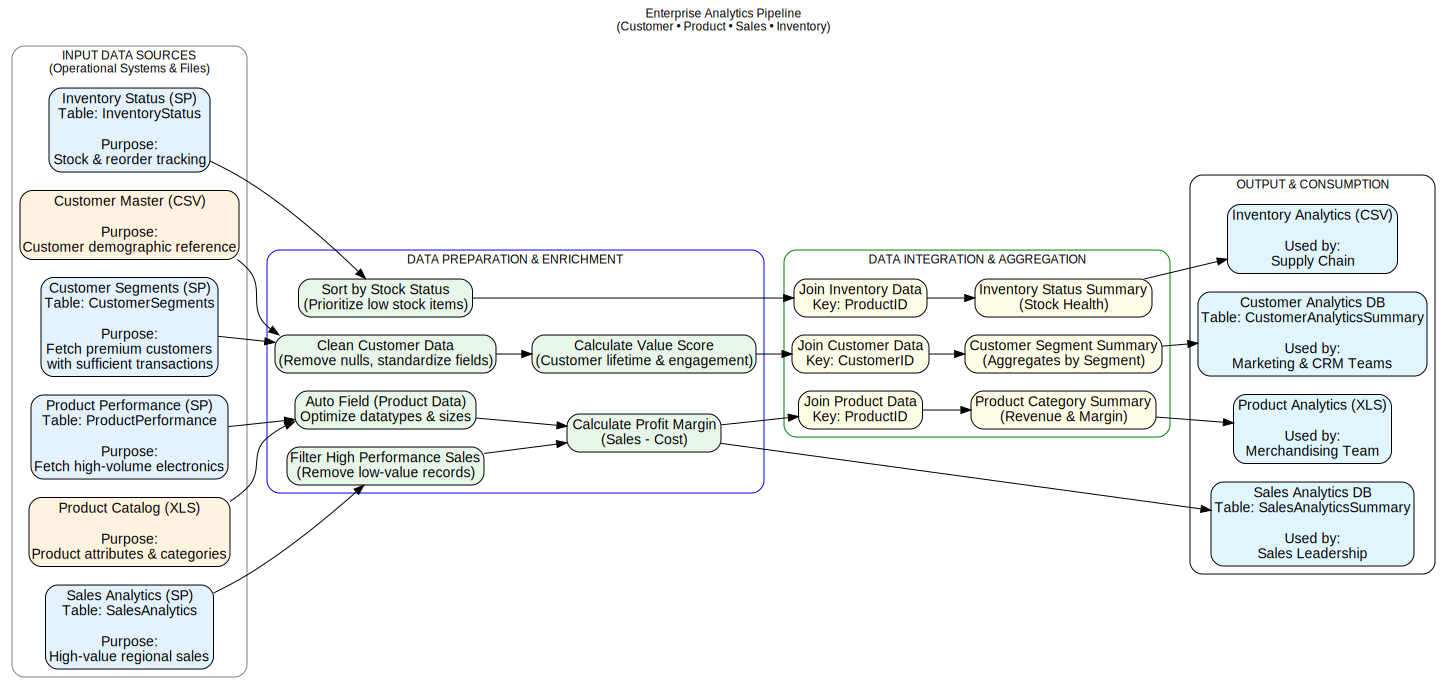

In [1]:
from graphviz import Digraph

dot = Digraph(

    name="Alteryx_STTM_Example2",

    format="png",

    graph_attr={

        "rankdir": "LR",

        "fontsize": "12",

        "fontname": "Helvetica",

        "label": "Enterprise Analytics Pipeline\n(Customer • Product • Sales • Inventory)",

        "labelloc": "t"

    },

    node_attr={

        "shape": "box",

        "style": "rounded,filled",

        "fontname": "Helvetica",

        "fillcolor": "white"

    },

    edge_attr={"fontsize": "10"}

)

# =====================================================

# INPUT LAYER

# =====================================================

with dot.subgraph(name="cluster_input") as c:

    c.attr(

        label="INPUT DATA SOURCES\n(Operational Systems & Files)",

        style="rounded",

        color="gray"

    )

    c.node(

        "cust_sp",

        "Customer Segments (SP)\nTable: CustomerSegments\n\nPurpose:\nFetch premium customers\nwith sufficient transactions",

        fillcolor="#E3F2FD"

    )

    c.node(

        "prod_sp",

        "Product Performance (SP)\nTable: ProductPerformance\n\nPurpose:\nFetch high-volume electronics",

        fillcolor="#E3F2FD"

    )

    c.node(

        "sales_sp",

        "Sales Analytics (SP)\nTable: SalesAnalytics\n\nPurpose:\nHigh-value regional sales",

        fillcolor="#E3F2FD"

    )

    c.node(

        "inv_sp",

        "Inventory Status (SP)\nTable: InventoryStatus\n\nPurpose:\nStock & reorder tracking",

        fillcolor="#E3F2FD"

    )

    c.node(

        "cust_master",

        "Customer Master (CSV)\n\nPurpose:\nCustomer demographic reference",

        fillcolor="#FFF3E0"

    )

    c.node(

        "product_catalog",

        "Product Catalog (XLS)\n\nPurpose:\nProduct attributes & categories",

        fillcolor="#FFF3E0"

    )

# =====================================================

# DATA PREPARATION LAYER

# =====================================================

with dot.subgraph(name="cluster_clean") as c:

    c.attr(

        label="DATA PREPARATION & ENRICHMENT",

        style="rounded",

        color="blue"

    )

    c.node(

        "clean_customer",

        "Clean Customer Data\n(Remove nulls, standardize fields)",

        fillcolor="#E8F5E9"

    )

    c.node(

        "calc_value",

        "Calculate Value Score\n(Customer lifetime & engagement)",

        fillcolor="#E8F5E9"

    )

    c.node(

        "autofield_product",

        "Auto Field (Product Data)\nOptimize datatypes & sizes",

        fillcolor="#E8F5E9"

    )

    c.node(

        "calc_margin",

        "Calculate Profit Margin\n(Sales - Cost)",

        fillcolor="#E8F5E9"

    )

    c.node(

        "filter_sales",

        "Filter High Performance Sales\n(Remove low-value records)",

        fillcolor="#E8F5E9"

    )

    c.node(

        "sort_inventory",

        "Sort by Stock Status\n(Prioritize low stock items)",

        fillcolor="#E8F5E9"

    )

# =====================================================

# JOIN & AGGREGATION LAYER

# =====================================================

with dot.subgraph(name="cluster_transform") as c:

    c.attr(

        label="DATA INTEGRATION & AGGREGATION",

        style="rounded",

        color="green"

    )

    c.node(

        "join_customer",

        "Join Customer Data\nKey: CustomerID",

        fillcolor="#FFFDE7"

    )

    c.node(

        "cust_summary",

        "Customer Segment Summary\n(Aggregates by Segment)",

        fillcolor="#FFFDE7"

    )

    c.node(

        "join_product",

        "Join Product Data\nKey: ProductID",

        fillcolor="#FFFDE7"

    )

    c.node(

        "product_summary",

        "Product Category Summary\n(Revenue & Margin)",

        fillcolor="#FFFDE7"

    )

    c.node(

        "join_inventory",

        "Join Inventory Data\nKey: ProductID",

        fillcolor="#FFFDE7"

    )

    c.node(

        "inventory_summary",

        "Inventory Status Summary\n(Stock Health)",

        fillcolor="#FFFDE7"

    )

# =====================================================

# OUTPUT LAYER

# =====================================================

with dot.subgraph(name="cluster_output") as c:

    c.attr(

        label="OUTPUT & CONSUMPTION",

        style="rounded",

        color="black"

    )

    c.node(

        "cust_db",

        "Customer Analytics DB\nTable: CustomerAnalyticsSummary\n\nUsed by:\nMarketing & CRM Teams",

        fillcolor="#E1F5FE"

    )

    c.node(

        "prod_xls",

        "Product Analytics (XLS)\n\nUsed by:\nMerchandising Team",

        fillcolor="#E1F5FE"

    )

    c.node(

        "sales_db",

        "Sales Analytics DB\nTable: SalesAnalyticsSummary\n\nUsed by:\nSales Leadership",

        fillcolor="#E1F5FE"

    )

    c.node(

        "inv_csv",

        "Inventory Analytics (CSV)\n\nUsed by:\nSupply Chain",

        fillcolor="#E1F5FE"

    )

# =====================================================

# FLOWS — CUSTOMER PIPELINE

# =====================================================

dot.edge("cust_sp", "clean_customer")

dot.edge("cust_master", "clean_customer")

dot.edge("clean_customer", "calc_value")

dot.edge("calc_value", "join_customer")

dot.edge("join_customer", "cust_summary")

dot.edge("cust_summary", "cust_db")

# =====================================================

# FLOWS — PRODUCT PIPELINE

# =====================================================

dot.edge("prod_sp", "autofield_product")

dot.edge("product_catalog", "autofield_product")

dot.edge("autofield_product", "calc_margin")

dot.edge("calc_margin", "join_product")

dot.edge("join_product", "product_summary")

dot.edge("product_summary", "prod_xls")

# =====================================================

# FLOWS — SALES PIPELINE

# =====================================================

dot.edge("sales_sp", "filter_sales")

dot.edge("filter_sales", "calc_margin")

dot.edge("calc_margin", "sales_db")

# =====================================================

# FLOWS — INVENTORY PIPELINE

# =====================================================

dot.edge("inv_sp", "sort_inventory")

dot.edge("sort_inventory", "join_inventory")

dot.edge("join_inventory", "inventory_summary")

dot.edge("inventory_summary", "inv_csv")

# =====================================================

# RENDER

# =====================================================

dot



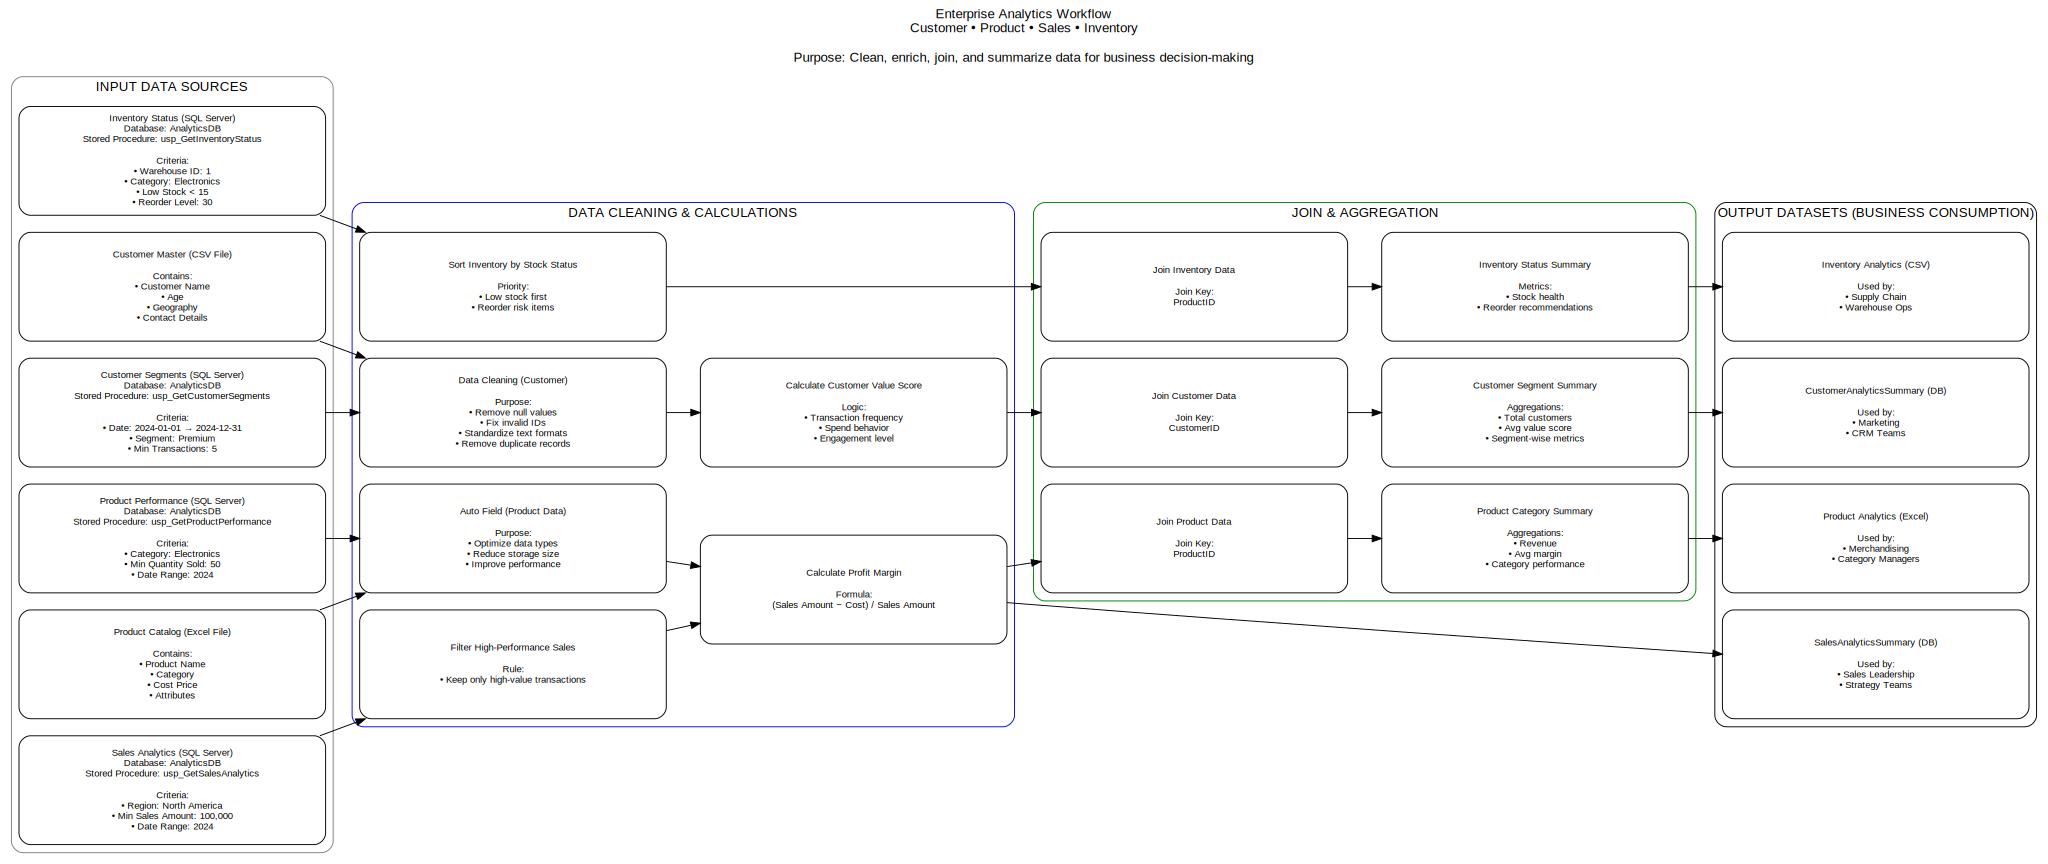

In [2]:
from graphviz import Digraph

dot = Digraph(
    name="Enterprise_Analytics_Pipeline",
    format="svg",   # SVG for clarity
    graph_attr={
        "rankdir": "LR",
        "fontsize": "14",
        "fontname": "Helvetica",
        "labelloc": "t",
        "label": (
            "Enterprise Analytics Workflow\n"
            "Customer • Product • Sales • Inventory\n\n"
            "Purpose: Clean, enrich, join, and summarize data for business decision-making"
        )
    },
    node_attr={
        "shape": "box",
        "style": "rounded,filled",
        "fontname": "Helvetica",
        "fontsize": "10",
        "width": "4.5",
        "height": "1.6",
        "fixedsize": "true",
        "fillcolor": "white"
    },
    edge_attr={"fontsize": "9"}
)

# =====================================================
# INPUT LAYER
# =====================================================
with dot.subgraph(name="cluster_input") as c:
    c.attr(label="INPUT DATA SOURCES", color="gray", style="rounded")

    c.node(
        "cust_sp",
        "Customer Segments (SQL Server)\n"
        "Database: AnalyticsDB\n"
        "Stored Procedure: usp_GetCustomerSegments\n\n"
        "Criteria:\n"
        "• Date: 2024-01-01 → 2024-12-31\n"
        "• Segment: Premium\n"
        "• Min Transactions: 5"
    )

    c.node(
        "prod_sp",
        "Product Performance (SQL Server)\n"
        "Database: AnalyticsDB\n"
        "Stored Procedure: usp_GetProductPerformance\n\n"
        "Criteria:\n"
        "• Category: Electronics\n"
        "• Min Quantity Sold: 50\n"
        "• Date Range: 2024"
    )

    c.node(
        "sales_sp",
        "Sales Analytics (SQL Server)\n"
        "Database: AnalyticsDB\n"
        "Stored Procedure: usp_GetSalesAnalytics\n\n"
        "Criteria:\n"
        "• Region: North America\n"
        "• Min Sales Amount: 100,000\n"
        "• Date Range: 2024"
    )

    c.node(
        "inv_sp",
        "Inventory Status (SQL Server)\n"
        "Database: AnalyticsDB\n"
        "Stored Procedure: usp_GetInventoryStatus\n\n"
        "Criteria:\n"
        "• Warehouse ID: 1\n"
        "• Category: Electronics\n"
        "• Low Stock < 15\n"
        "• Reorder Level: 30"
    )

    c.node(
        "cust_csv",
        "Customer Master (CSV File)\n\n"
        "Contains:\n"
        "• Customer Name\n"
        "• Age\n"
        "• Geography\n"
        "• Contact Details"
    )

    c.node(
        "prod_xls",
        "Product Catalog (Excel File)\n\n"
        "Contains:\n"
        "• Product Name\n"
        "• Category\n"
        "• Cost Price\n"
        "• Attributes"
    )

# =====================================================
# DATA CLEANING & CALCULATION
# =====================================================
with dot.subgraph(name="cluster_clean") as c:
    c.attr(label="DATA CLEANING & CALCULATIONS", color="blue", style="rounded")

    c.node(
        "clean_customer",
        "Data Cleaning (Customer)\n\n"
        "Purpose:\n"
        "• Remove null values\n"
        "• Fix invalid IDs\n"
        "• Standardize text formats\n"
        "• Remove duplicate records"
    )

    c.node(
        "calc_value",
        "Calculate Customer Value Score\n\n"
        "Logic:\n"
        "• Transaction frequency\n"
        "• Spend behavior\n"
        "• Engagement level"
    )

    c.node(
        "autofield_product",
        "Auto Field (Product Data)\n\n"
        "Purpose:\n"
        "• Optimize data types\n"
        "• Reduce storage size\n"
        "• Improve performance"
    )

    c.node(
        "calc_margin",
        "Calculate Profit Margin\n\n"
        "Formula:\n"
        "(Sales Amount − Cost) / Sales Amount"
    )

    c.node(
        "filter_sales",
        "Filter High-Performance Sales\n\n"
        "Rule:\n"
        "• Keep only high-value transactions"
    )

    c.node(
        "sort_inventory",
        "Sort Inventory by Stock Status\n\n"
        "Priority:\n"
        "• Low stock first\n"
        "• Reorder risk items"
    )

# =====================================================
# JOIN & AGGREGATION
# =====================================================
with dot.subgraph(name="cluster_transform") as c:
    c.attr(label="JOIN & AGGREGATION", color="green", style="rounded")

    c.node(
        "join_customer",
        "Join Customer Data\n\n"
        "Join Key:\n"
        "CustomerID"
    )

    c.node(
        "cust_summary",
        "Customer Segment Summary\n\n"
        "Aggregations:\n"
        "• Total customers\n"
        "• Avg value score\n"
        "• Segment-wise metrics"
    )

    c.node(
        "join_product",
        "Join Product Data\n\n"
        "Join Key:\n"
        "ProductID"
    )

    c.node(
        "product_summary",
        "Product Category Summary\n\n"
        "Aggregations:\n"
        "• Revenue\n"
        "• Avg margin\n"
        "• Category performance"
    )

    c.node(
        "join_inventory",
        "Join Inventory Data\n\n"
        "Join Key:\n"
        "ProductID"
    )

    c.node(
        "inventory_summary",
        "Inventory Status Summary\n\n"
        "Metrics:\n"
        "• Stock health\n"
        "• Reorder recommendations"
    )

# =====================================================
# OUTPUT
# =====================================================
with dot.subgraph(name="cluster_output") as c:
    c.attr(label="OUTPUT DATASETS (BUSINESS CONSUMPTION)", style="rounded")

    c.node(
        "cust_out",
        "CustomerAnalyticsSummary (DB)\n\n"
        "Used by:\n"
        "• Marketing\n"
        "• CRM Teams"
    )

    c.node(
        "prod_out",
        "Product Analytics (Excel)\n\n"
        "Used by:\n"
        "• Merchandising\n"
        "• Category Managers"
    )

    c.node(
        "sales_out",
        "SalesAnalyticsSummary (DB)\n\n"
        "Used by:\n"
        "• Sales Leadership\n"
        "• Strategy Teams"
    )

    c.node(
        "inv_out",
        "Inventory Analytics (CSV)\n\n"
        "Used by:\n"
        "• Supply Chain\n"
        "• Warehouse Ops"
    )

# =====================================================
# FLOWS
# =====================================================
dot.edges([
    ("cust_sp", "clean_customer"),
    ("cust_csv", "clean_customer"),
    ("clean_customer", "calc_value"),
    ("calc_value", "join_customer"),
    ("join_customer", "cust_summary"),
    ("cust_summary", "cust_out"),

    ("prod_sp", "autofield_product"),
    ("prod_xls", "autofield_product"),
    ("autofield_product", "calc_margin"),
    ("calc_margin", "join_product"),
    ("join_product", "product_summary"),
    ("product_summary", "prod_out"),

    ("sales_sp", "filter_sales"),
    ("filter_sales", "calc_margin"),
    ("calc_margin", "sales_out"),

    ("inv_sp", "sort_inventory"),
    ("sort_inventory", "join_inventory"),
    ("join_inventory", "inventory_summary"),
    ("inventory_summary", "inv_out")
])

# =====================================================
# RENDER (SVG + PDF)
# =====================================================
dot.render("enterprise_analytics_pipeline", format="svg", cleanup=True)
dot.render("enterprise_analytics_pipeline", format="pdf", cleanup=True)

dot

In [6]:
from pyvis.network import Network

net = Network(
    height="900px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black",
    notebook=True
)

# =========================
# GLOBAL NODE STYLE
# =========================
NODE_STYLE = {
    "shape": "box",
    "font": {"size": 12},
    "widthConstraint": {"minimum": 260, "maximum": 260},
    "heightConstraint": {"minimum": 120},
}

# =========================
# INPUT LAYER
# =========================
net.add_node(
    "cust_sp",
    label="Customer Segments\n(SQL Server)",
    title=(
        "<b>Database:</b> AnalyticsDB<br>"
        "<b>Stored Procedure:</b> usp_GetCustomerSegments<br><br>"
        "<b>Criteria:</b><br>"
        "• Date: 2024-01-01 → 2024-12-31<br>"
        "• Segment: Premium<br>"
        "• Min Transactions: 5"
    ),
    color="#E3F2FD",
    x=0, y=0,
    **NODE_STYLE
)

net.add_node(
    "prod_sp",
    label="Product Performance\n(SQL Server)",
    title=(
        "<b>Database:</b> AnalyticsDB<br>"
        "<b>Stored Procedure:</b> usp_GetProductPerformance<br><br>"
        "<b>Criteria:</b><br>"
        "• Category: Electronics<br>"
        "• Min Quantity: 50<br>"
        "• Date Range: 2024"
    ),
    color="#E3F2FD",
    x=0, y=200,
    **NODE_STYLE
)

net.add_node(
    "sales_sp",
    label="Sales Analytics\n(SQL Server)",
    title=(
        "<b>Database:</b> AnalyticsDB<br>"
        "<b>Stored Procedure:</b> usp_GetSalesAnalytics<br><br>"
        "<b>Criteria:</b><br>"
        "• Region: North America<br>"
        "• Min Sales Amount: 100,000<br>"
        "• Date Range: 2024"
    ),
    color="#E3F2FD",
    x=0, y=400,
    **NODE_STYLE
)

net.add_node(
    "inv_sp",
    label="Inventory Status\n(SQL Server)",
    title=(
        "<b>Database:</b> AnalyticsDB<br>"
        "<b>Stored Procedure:</b> usp_GetInventoryStatus<br><br>"
        "<b>Criteria:</b><br>"
        "• Warehouse ID: 1<br>"
        "• Category: Electronics<br>"
        "• Low Stock &lt; 15<br>"
        "• Reorder Level: 30"
    ),
    color="#E3F2FD",
    x=0, y=600,
    **NODE_STYLE
)

net.add_node(
    "cust_csv",
    label="Customer Master\n(CSV)",
    title="Customer reference data:\n• Name\n• Geography\n• Demographics",
    color="#FFF3E0",
    x=0, y=800,
    **NODE_STYLE
)

net.add_node(
    "prod_xls",
    label="Product Catalog\n(Excel)",
    title="Product reference data:\n• Category\n• Cost\n• Attributes",
    color="#FFF3E0",
    x=0, y=1000,
    **NODE_STYLE
)

# =========================
# CLEANING & CALCULATIONS
# =========================
net.add_node(
    "clean_customer",
    label="Clean Customer Data",
    title=(
        "<b>Purpose:</b><br>"
        "• Remove null values<br>"
        "• Fix invalid IDs<br>"
        "• Remove duplicates<br>"
        "• Standardize formats"
    ),
    color="#E8F5E9",
    x=400, y=100,
    **NODE_STYLE
)

net.add_node(
    "calc_value",
    label="Calculate\nCustomer Value Score",
    title="Uses spend, frequency, and engagement metrics",
    color="#E8F5E9",
    x=400, y=250,
    **NODE_STYLE
)

net.add_node(
    "autofield_product",
    label="Auto Field\n(Product Data)",
    title="Optimizes datatypes for performance and storage",
    color="#E8F5E9",
    x=400, y=450,
    **NODE_STYLE
)

net.add_node(
    "calc_margin",
    label="Calculate\nProfit Margin",
    title="Formula: (Sales − Cost) / Sales",
    color="#E8F5E9",
    x=400, y=600,
    **NODE_STYLE
)

net.add_node(
    "filter_sales",
    label="Filter High-Value Sales",
    title="Removes low-value transactions",
    color="#E8F5E9",
    x=400, y=800,
    **NODE_STYLE
)

net.add_node(
    "sort_inventory",
    label="Sort by Stock Status",
    title="Low stock items prioritized for action",
    color="#E8F5E9",
    x=400, y=950,
    **NODE_STYLE
)

# =========================
# JOIN & AGGREGATION
# =========================
net.add_node(
    "join_customer",
    label="Join Customer Data",
    title="Join Key: CustomerID",
    color="#FFFDE7",
    x=800, y=200,
    **NODE_STYLE
)

net.add_node(
    "cust_summary",
    label="Customer Segment Summary",
    title="Aggregated by customer segment",
    color="#FFFDE7",
    x=1100, y=200,
    **NODE_STYLE
)

net.add_node(
    "join_product",
    label="Join Product Data",
    title="Join Key: ProductID",
    color="#FFFDE7",
    x=800, y=500,
    **NODE_STYLE
)

net.add_node(
    "product_summary",
    label="Product Category Summary",
    title="Revenue and margin by category",
    color="#FFFDE7",
    x=1100, y=500,
    **NODE_STYLE
)

net.add_node(
    "join_inventory",
    label="Join Inventory Data",
    title="Join Key: ProductID",
    color="#FFFDE7",
    x=800, y=900,
    **NODE_STYLE
)

net.add_node(
    "inventory_summary",
    label="Inventory Status Summary",
    title="Stock health and reorder indicators",
    color="#FFFDE7",
    x=1100, y=900,
    **NODE_STYLE
)

# =========================
# OUTPUTS
# =========================
net.add_node(
    "cust_out",
    label="CustomerAnalyticsSummary\n(DB)",
    title="Used by Marketing & CRM teams",
    color="#E1F5FE",
    x=1500, y=200,
    **NODE_STYLE
)

net.add_node(
    "prod_out",
    label="Product Analytics\n(Excel)",
    title="Used by Merchandising teams",
    color="#E1F5FE",
    x=1500, y=500,
    **NODE_STYLE
)

net.add_node(
    "sales_out",
    label="SalesAnalyticsSummary\n(DB)",
    title="Used by Sales leadership",
    color="#E1F5FE",
    x=1500, y=700,
    **NODE_STYLE
)

net.add_node(
    "inv_out",
    label="Inventory Analytics\n(CSV)",
    title="Used by Supply Chain teams",
    color="#E1F5FE",
    x=1500, y=900,
    **NODE_STYLE
)

# =========================
# EDGES (FLOWS)
# =========================
edges = [
    ("cust_sp", "clean_customer"),
    ("cust_csv", "clean_customer"),
    ("clean_customer", "calc_value"),
    ("calc_value", "join_customer"),
    ("join_customer", "cust_summary"),
    ("cust_summary", "cust_out"),

    ("prod_sp", "autofield_product"),
    ("prod_xls", "autofield_product"),
    ("autofield_product", "calc_margin"),
    ("calc_margin", "join_product"),
    ("join_product", "product_summary"),
    ("product_summary", "prod_out"),

    ("sales_sp", "filter_sales"),
    ("filter_sales", "calc_margin"),
    ("calc_margin", "sales_out"),

    ("inv_sp", "sort_inventory"),
    ("sort_inventory", "join_inventory"),
    ("join_inventory", "inventory_summary"),
    ("inventory_summary", "inv_out"),
]

for src, dst in edges:
    net.add_edge(src, dst)

# =========================
# SAVE OUTPUT
# =========================
net.show("enterprise_analytics_pipeline_pyvis.html")

enterprise_analytics_pipeline_pyvis.html
